# Group 2 V-Track: Technical Pitch
> Members:
> - Shantanu Dixit - 8965610
> - Serageldin Monir Farid Abdelghaffar Abdelmoaty - 9052380
> - Tai Siang Huang - 9006413
> - Jaiminiben Natvarbhai Rathod - 8941937
> - Mohammed Adeen Shaik - 8969152
---

## Washington DC Stop Data
The dataset from https://catalog.data.gov/dataset/stop-data-b6fdf contains stop data from the Metropolitan Police Department (MPD) in Washington, D.C., covering vehicle, pedestrian, bicycle, and harbor stops from January 1, 2023, to June 30, 2024. It includes details such as stop location, reason, duration, and outcomes (e.g., tickets, searches, arrests), with data reflecting updates from the NEAR Act and a new records management system since August 2021.

### Introduction of V-TRACK 

Objective: Optimize average stop time from 15 minutes to under 10 minutes.

Dataset Size: 279,936 total records (2019–2022).

Focus Subset: 127,939 stops involving observed moving violations with tickets.

Data Source: Washington DC Metropolitan Police Department – Data.gov Stop Data.

Target Variable: STOP_DURATION (in minutes).

Key Features Used: GENDER, ETHNICITY, AGE, TICKET_COUNT, HOUR, SEARCH_FLAG, etc.

Other Datasets : 
1) San fransisco Dataset:  https://data.sfgov.org/Public-Safety/Police-Department-Stop-Data/ubqf-aqzw/about_data
2) San diego Dataset: https://data.sandiego.gov/datasets/police-ripa-stops/
3) California Dataset: https://openjustice.doj.ca.gov/data



## EDA

### Load the Liberary

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

### Load the Dataset

In [3]:
# Load your dataset
df = pd.read_csv("./datasets/Stop_Data_2019_to_2022.csv")  # Use your file path if needed

# Show first few rows
df.head()

C:\Users\patti\AppData\Local\Temp\ipykernel_14564\1652492941.py:2: DtypeWarning: Columns (7,26,30,35,38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./datasets/Stop_Data_2019_to_2022.csv")  # Use your file path if needed


,CCN_ANONYMIZED,STOP_TYPE,DATETIME,STOP_LOCATION,STOP_DISTRICT,STOP_DURATION_MINS,STOP_REASON_NONTICKET,STOP_REASON_HARBOR,STOP_REASON_TICKET,PERSON_SEARCH_PAT_DOWN,...,BICYCLE_PMD,PEDESTRIAN,HARBOR,INVESTIGATIVE,TRAFFIC_INVOLVED,GIS_ID,CREATED,EDITED,OBJECTID,GLOBALID
0,df8eab5aa9c8055c8ec149204d376beeb422e182bbbb71...,Non-ticket Stop,2021/12/29 13:00:00+00,"300 BLOCK OF 33RD DC, DC 20019 UNITED STATES",6.0,30.0,Call for service,NaN,NaN,0,...,0,0,0,1,0,NaN,NaN,NaN,280321,{96FB2C7A-1B0A-45F2-9A65-0B900CD8E87A}
1,364201002193313ae4b99e8455517ec24ce28a63d5446d...,Non-ticket Stop,2021/12/29 13:48:00+00,NaN,4.0,7.0,Call for service,NaN,NaN,0,...,0,0,0,1,0,NaN,NaN,NaN,280322,{C0F1EC59-8B26-4618-86B0-3A0C480DB33E}
2,367f1304e9ac5c4bb5bbd42fc75091ec689f5a45cbc385...,Non-ticket Stop,2021/12/29 15:07:00+00,"3700 BLOCK OF MINNESOTA AVENUE NE WASHINGTON, ...",6.0,3.0,Call for service,NaN,NaN,0,...,0,0,0,1,0,NaN,NaN,NaN,280323,{0BB100B4-A06A-467C-91FC-95558659796A}
3,c25fb89c2c556d230540a574de9b48e7ba2317f584a55d...,Non-ticket Stop,2021/12/29 15:00:00+00,"4100 BLOCK OF 1ST DC, WASHINGTON 20032 UNITED ...",NaN,30.0,Call for service,NaN,NaN,1,...,0,0,0,1,0,NaN,NaN,NaN,280324,{570F50DD-47E4-4CF6-803E-AB82753B9CE1}
4,c25fb89c2c556d230540a574de9b48e7ba2317f584a55d...,Non-ticket Stop,2021/12/29 15:00:00+00,"4100 BLOCK OF 1ST DC, WASHINGTON 20032 UNITED ...",NaN,30.0,Call for service,NaN,NaN,0,...,0,0,0,1,0,NaN,NaN,NaN,280325,{EF316A0F-77C9-4710-923A-DFA41CDA546F}


In [4]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279936 entries, 0 to 279935
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CCN_ANONYMIZED              118088 non-null  object 
 1   STOP_TYPE                   279936 non-null  object 
 2   DATETIME                    279936 non-null  object 
 3   STOP_LOCATION               277744 non-null  object 
 4   STOP_DISTRICT               277450 non-null  float64
 5   STOP_DURATION_MINS          277305 non-null  float64
 6   STOP_REASON_NONTICKET       118070 non-null  object 
 7   STOP_REASON_HARBOR          1111 non-null    object 
 8   STOP_REASON_TICKET          163036 non-null  object 
 9   PERSON_SEARCH_PAT_DOWN      279936 non-null  int64  
 10  PROPERTY_SEARCH_PAT_DOWN    279936 non-null  int64  
 11  PERSON_SEARCH_CONSENT       279936 non-null  int64  
 12  PERSON_SEARCH_PROB_CAUSE    279936 non-null  int64  
 13  PERSON_PROT_PA

In [5]:
# we need to convert this string to lower case to avoid duplicates
df['STOP_REASON_TICKET'] = df['STOP_REASON_TICKET'].str.lower()
df.STOP_REASON_TICKET.value_counts().head(10)

STOP_REASON_TICKET
observed moving violation                                    127939
observed equipment violation                                  15294
calls for service                                             10021
response to crash                                              8812
bolo/lookout                                                    322
info. obtained from le sources                                  281
self-initiated: suspicion of a non-traffic crim. activity       210
observed a weapon                                                71
observed equipment violation; observed moving violation          18
observed moving violation; observed equipment violation          14
Name: count, dtype: int64

### Formatting

In [6]:
df['STOP_REASON_TICKET'] = df['STOP_REASON_TICKET'].str.lower()
# filter out only the ticketed stops for observed moving violations
df_ticketed = df[df['STOP_REASON_TICKET'].str.contains('observed moving violation', na=False)]
df_ticketed.drop(columns=['STOP_REASON_TICKET','STOP_TYPE','STOP_REASON_NONTICKET','STOP_REASON_HARBOR'], inplace=True)

C:\Users\patti\AppData\Local\Temp\ipykernel_14564\613338637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticketed.drop(columns=['STOP_REASON_TICKET','STOP_TYPE','STOP_REASON_NONTICKET','STOP_REASON_HARBOR'], inplace=True)


In [7]:
# Standardize column names
df_ticketed.columns = df_ticketed.columns.str.upper().str.strip()
# Rename the actual column for clarity and consistency
df_ticketed.rename(columns={"STOP_DURATION_MINS": "STOP_DURATION"}, inplace=True)
# Convert STOP_DISTRICT to numeric (force non-numeric to NaN)
df_ticketed['STOP_DISTRICT'] = pd.to_numeric(df_ticketed['STOP_DISTRICT'], errors='coerce')
# let's create columns for time of day from DATETIME
df_ticketed['DATETIME'] = pd.to_datetime(df_ticketed['DATETIME'], errors='coerce')

df_ticketed['HOUR'] = df_ticketed['DATETIME'].dt.hour
df_ticketed['MINUTE'] = df_ticketed['DATETIME'].dt.minute
df_ticketed['TIME_OF_DAY'] = df_ticketed['HOUR'] + df_ticketed['MINUTE']/60

df_ticketed.shape

C:\Users\patti\AppData\Local\Temp\ipykernel_14564\783864364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticketed.rename(columns={"STOP_DURATION_MINS": "STOP_DURATION"}, inplace=True)
C:\Users\patti\AppData\Local\Temp\ipykernel_14564\783864364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticketed['STOP_DISTRICT'] = pd.to_numeric(df_ticketed['STOP_DISTRICT'], errors='coerce')
C:\Users\patti\AppData\Local\Temp\ipykernel_14564\783864364.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

(127985, 60)

In [8]:
df_ticketed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127985 entries, 43 to 279935
Data columns (total 60 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   CCN_ANONYMIZED              3135 non-null    object             
 1   DATETIME                    127985 non-null  datetime64[ns, UTC]
 2   STOP_LOCATION               127976 non-null  object             
 3   STOP_DISTRICT               126998 non-null  float64            
 4   STOP_DURATION               127750 non-null  float64            
 5   PERSON_SEARCH_PAT_DOWN      127985 non-null  int64              
 6   PROPERTY_SEARCH_PAT_DOWN    127985 non-null  int64              
 7   PERSON_SEARCH_CONSENT       127985 non-null  int64              
 8   PERSON_SEARCH_PROB_CAUSE    127985 non-null  int64              
 9   PERSON_PROT_PAT_DOWN        127985 non-null  int64              
 10  PERSON_SEARCH_WARRANT       127985 non-null  int

### Drop Columns

In [9]:
cols_to_drop = [  
    'PERSON_SEARCH_REA_CONSENT', 'PERSON_SRCH_PROB_CAUSE', 'PERSON_PAT_DOWN_REASON',
    'PERSON_SRCH_REASON_WARRANT', 'PROP_SRCH_REASON_CONSENT', 'PROP_SRCH_PROB_CAUSE',
    'PROP_PAT_DOWN_REASON', 'PROP_SRCH_REASON_WARRANT', 'PROPERTY_SRCH_OBJ_CONSENT',
    'PROP_SRCH_OBJ_PROB_CAUSE', 'PROP_PAT_DOWN_OBJ', 'PROP_SRCH_OBJ_WARRANT',
    'PERSON_SRCH_OBJ_SEIZED_CON', 'PERSON_SRCH_OBJ_PROB_CAUSE', 'PER_PRO_PAT_DOWN_OBJ_SEIZE',
    'PERSON_SRCH_OBJ_SEIZED_WAR', 'PROP_SRCH_OBJ_SEIZE_CON', 'PROP_SRCH_OBJ_SEIZE_CAUSE',
    'PROP_PAT_DOWN_OBJ_SEIZED', 'PROP_SEARCH_OBJ_WARRANT',
    'VOIDED_TICKETS',
    'ARREST_CHARGES', 'ARREST_DATE',
    'GIS_ID', 'CREATED', 'EDITED', 'OBJECTID', 'GLOBALID'
]

df_ticketed.drop(columns=cols_to_drop, inplace=True)

C:\Users\patti\AppData\Local\Temp\ipykernel_14564\3885656027.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticketed.drop(columns=cols_to_drop, inplace=True)


### Missing values

In [10]:
# Check column names and missing values
print("Missing values:\n", df_ticketed.isnull().sum())


Missing values:
 CCN_ANONYMIZED                124850
DATETIME                           0
STOP_LOCATION                      9
STOP_DISTRICT                    987
STOP_DURATION                    235
PERSON_SEARCH_PAT_DOWN             0
PROPERTY_SEARCH_PAT_DOWN           0
PERSON_SEARCH_CONSENT              0
PERSON_SEARCH_PROB_CAUSE           0
PERSON_PROT_PAT_DOWN               0
PERSON_SEARCH_WARRANT              0
PROPERTY_SEARCH_CONSENT            0
PROPERTY_SEARCH_PROB_CAUSE         0
PROPERTY_PROT_PAT_DOWN             0
PROPERTY_SEARCH_WARRANT            0
TICKETS_ISSUED                 44029
WARNINGS_ISSUED                75653
TICKET_COUNT                       0
WARNING_COUNT                      0
VOID_COUNT                         0
GENDER                             0
ETHNICITY                       1007
AGE                              603
VEHICLE                            0
BICYCLE_PMD                        0
PEDESTRIAN                         0
HARBOR               

In [11]:
# check how many value of STOP_DURATION are negative or zero
negative_or_zero_count = df_ticketed[df_ticketed['STOP_DURATION'] <= 0].shape[0]
# check how many value of STOP_DURATION are over 1 day (1440 minutes)
over_one_day_count = df_ticketed[df_ticketed['STOP_DURATION'] > 1440].shape[0]

print(f"Negative or zero STOP_DURATION count: {negative_or_zero_count}")
print(f"STOP_DURATION over 1 day count: {over_one_day_count}")

Negative or zero STOP_DURATION count: 167
STOP_DURATION over 1 day count: 0


### Handle Missing Values

In [12]:
# Now perform cleaning on STOP_DURATION
df_ticketed = df_ticketed[df_ticketed['STOP_DURATION'] > 0]            # Remove negatives
df_ticketed = df_ticketed[df_ticketed['STOP_DURATION'] < 1440]         # Remove extreme outliers (more than 24 hours)

# Now fill missing values with the median
df_ticketed['STOP_DISTRICT'] = df_ticketed['STOP_DISTRICT'].fillna(df_ticketed['STOP_DISTRICT'].median())


- `CCN_ANONYMIZED` and `STOP_LOCATION_BLOCK` are acceptable to be empty

### Distribution of STOP_DURATION

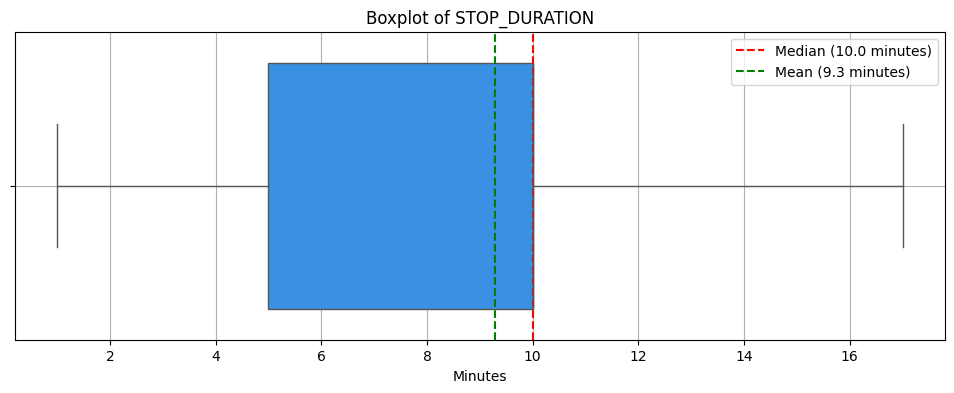

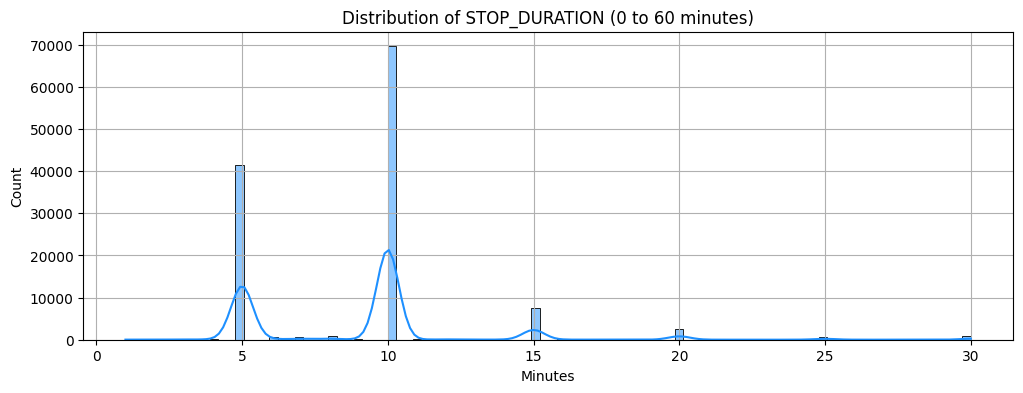

In [13]:
# Boxplot of STOP_DURATION without outliers
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_ticketed['STOP_DURATION'], color='dodgerblue', showfliers=False)
median_value = df_ticketed['STOP_DURATION'].median()
mean_value = df_ticketed['STOP_DURATION'].mean()
plt.axvline(x=median_value, color='r', linestyle='--', label=f'Median ({median_value:.1f} minutes)')
plt.axvline(x=mean_value, color='g', linestyle='--', label=f'Mean ({mean_value:.1f} minutes)')
plt.title('Boxplot of STOP_DURATION')
plt.xlabel('Minutes')
plt.grid(True)
plt.legend()
plt.show()

# histogram of STOP_DURATION between 0 and 60 minutes
plt.figure(figsize=(12,4))
sns.histplot(df_ticketed[df_ticketed['STOP_DURATION'] <= 30]['STOP_DURATION'], bins=100, kde=True, color='dodgerblue')
plt.title('Distribution of STOP_DURATION (0 to 60 minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Most stops are resolved within **5–20 minutes**.

There's a heavy right tail, meaning a small number of cases take a much longer time.

This skewness supports the case for optimizing outliers using AI-assisted tools, like your proposed RAG-based system.

### CCN_ANONYMIZED with STOP_DURATION

In [14]:
#the column CCN_ANONYMIZED is a criminal cimplaint number, we can tell if a complaint was issued by checking if the value is not null
df_ticketed['CCN_ANONYMIZED'].notnull().value_counts()

CCN_ANONYMIZED
False    124448
True       3135
Name: count, dtype: int64

This means that out of 127,939 cases, a total of 3135 cases were filed for complaints

In [15]:
#let's create a new column to indicate if a complaint was issued
df_ticketed['COMPLAINT_ISSUED'] = df_ticketed['CCN_ANONYMIZED'].notnull().astype(int)

#now we can drop the CCN_ANONYMIZED column
df_ticketed.drop(columns=['CCN_ANONYMIZED'], inplace=True)

In [16]:
# Group by COMPLAINT_ISSUED and calculate the mean stop duration
avg_stop_duration = df_ticketed.groupby('COMPLAINT_ISSUED')['STOP_DURATION'].mean().reset_index()
avg_stop_duration.columns = ['Complaint Issued', 'Average Stop Duration (minutes)']

#print the average stop duration for complaint issued vs not issued
print(avg_stop_duration)

   Complaint Issued  Average Stop Duration (minutes)
0                 0                         9.018160
1                 1                        20.016906


Now, this is a major finding.

The average stop time for a raised complaint case is more than twice that of a non raised complaint

### Distribution of Stops by 7 District

In [17]:
#convert stop district from float to categorical
df_ticketed['STOP_DISTRICT'] = df_ticketed['STOP_DISTRICT'].astype('category')

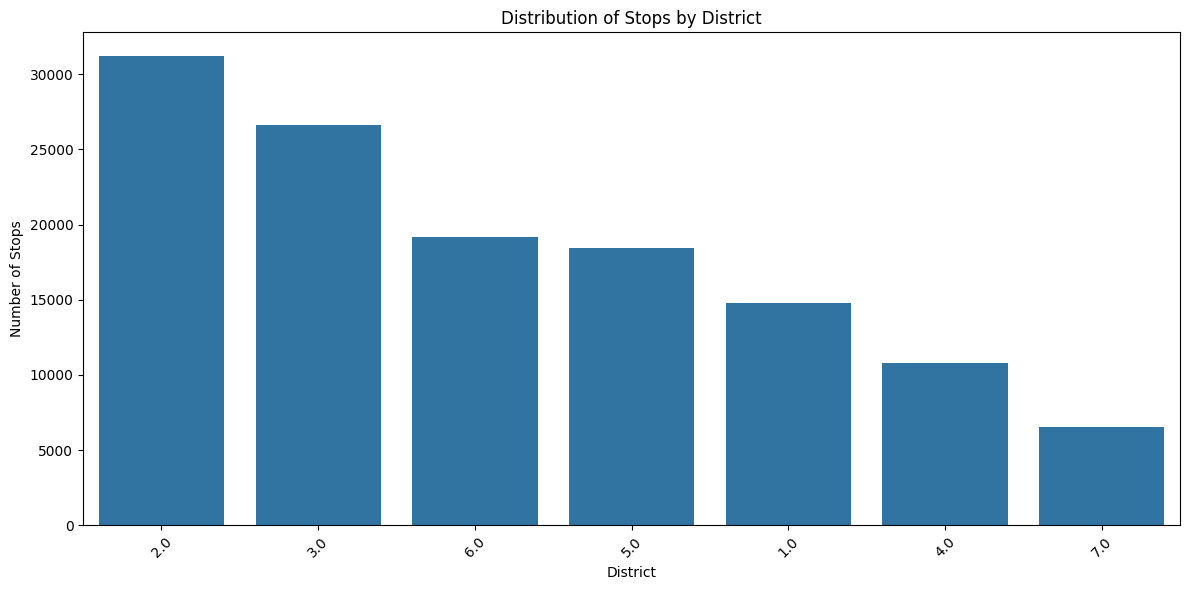

In [18]:
# Let's look at the distribution of stop districts
plt.figure(figsize=(12, 6))
sns.countplot(data=df_ticketed, x='STOP_DISTRICT', order=df_ticketed['STOP_DISTRICT'].value_counts().index)
plt.title('Distribution of Stops by District')
plt.xlabel('District')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Stop Duration by Time of Day

C:\Users\patti\AppData\Local\Temp\ipykernel_14564\2844779979.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stop_duration = df_ticketed.groupby('TIME_OF_DAY')['STOP_DURATION'].mean().reset_index()
C:\Users\patti\AppData\Local\Temp\ipykernel_14564\2844779979.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TIME_OF_DAY', y='STOP_DURATION', data=avg_stop_duration, palette='viridis')


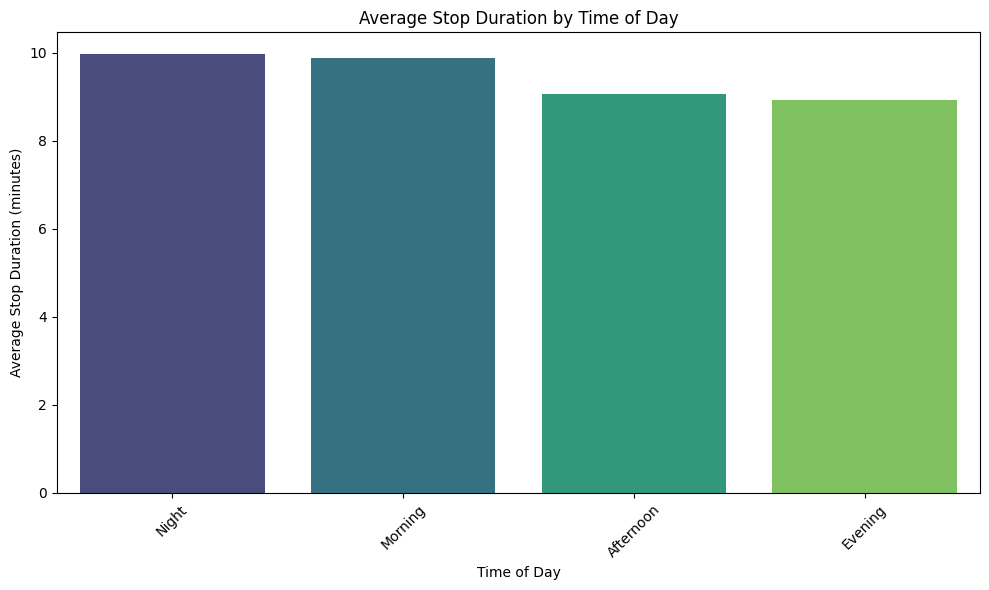

In [19]:
# let's look at average stop_duration_mins column by time of day, show labels for frequencies for every 6 hours(Morning, Afternoon, Evening, Night)
df_ticketed['TIME_OF_DAY'] = pd.cut(df_ticketed['TIME_OF_DAY'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Calculate average stop duration by time of day
avg_stop_duration = df_ticketed.groupby('TIME_OF_DAY')['STOP_DURATION'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='TIME_OF_DAY', y='STOP_DURATION', data=avg_stop_duration, palette='viridis')
plt.title('Average Stop Duration by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Stop Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Invetigation Issued

In [20]:
# Group by INVESTIGATIVE and calculate the mean stop duration
avg_stop_duration_is = df_ticketed.groupby('INVESTIGATIVE')['STOP_DURATION'].mean().reset_index()
avg_stop_duration_is.columns = ['Invetigation Issued', 'Average Stop Duration (minutes)']

#print the average stop duration for complaint issued vs not issued
print(avg_stop_duration_is)

   Invetigation Issued  Average Stop Duration (minutes)
0                    0                         9.018160
1                    1                        20.016906


In [21]:
# Check for cases where investigative is True and complaint is not issued

investigative_no_complaint = df_ticketed[(df_ticketed['INVESTIGATIVE'] == True) & (df_ticketed['COMPLAINT_ISSUED'] == 0)]
print(f"Number of stops where investigative is True and complaint is not issued: {len(investigative_no_complaint)}")

Number of stops where investigative is True and complaint is not issued: 0


In [22]:
# checl for cases where investigative is False and complaint is issued
investigative_with_complaint = df_ticketed[(df_ticketed['INVESTIGATIVE'] == False) & (df_ticketed['COMPLAINT_ISSUED'] == 1)]
print(f"Number of stops where investigative is False and complaint is issued: {len(investigative_with_complaint)}")

Number of stops where investigative is False and complaint is issued: 0


In [23]:
df_ticketed=df_ticketed[df_ticketed["INVESTIGATIVE"]==True]

In [24]:
# check for cases where investigative is True and complaint is issued
investigative_with_complaint_issued = df_ticketed[(df_ticketed['INVESTIGATIVE'] == True) & (df_ticketed['COMPLAINT_ISSUED'] == 1)]
print(f"Number of stops where investigative is True and complaint is issued: {len(investigative_with_complaint_issued)}")

Number of stops where investigative is True and complaint is issued: 3135


### Correlation Matrix of Numerical Columns

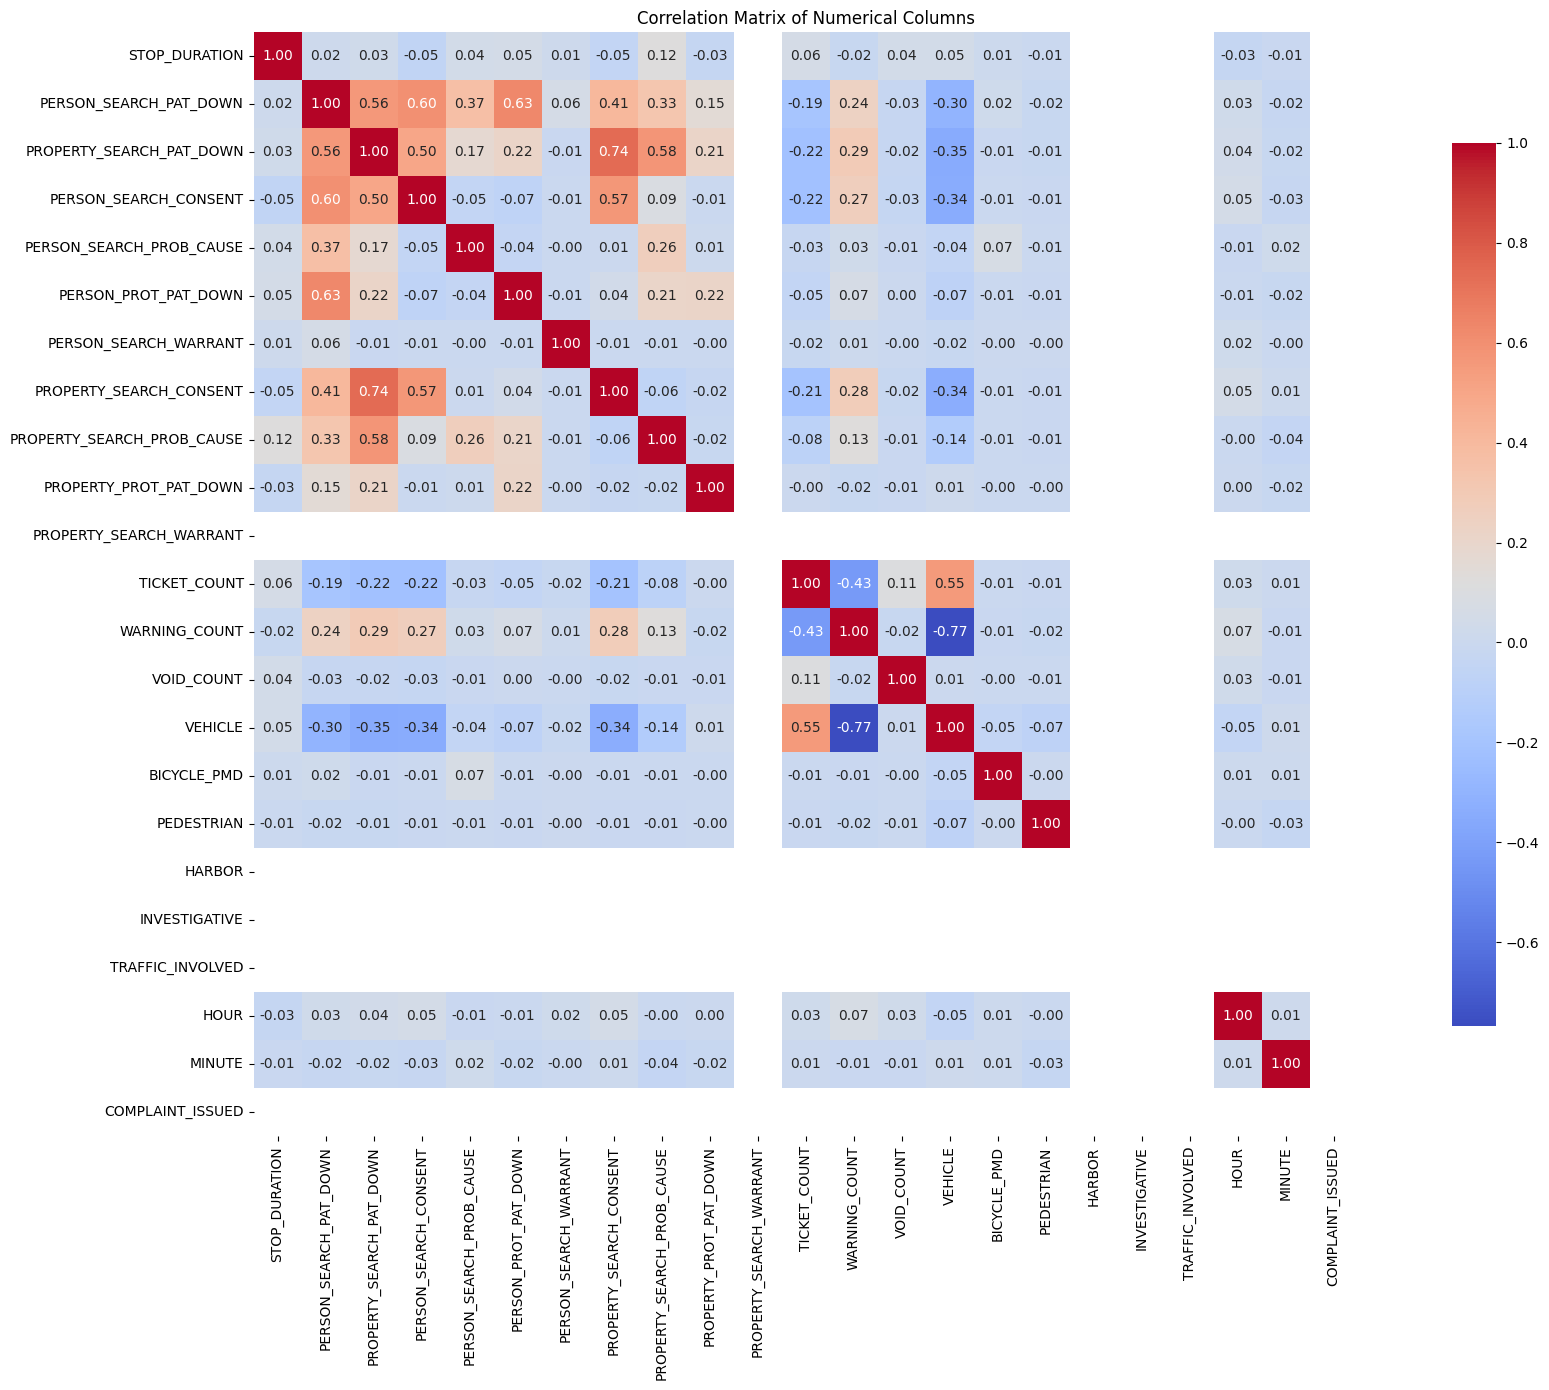

In [25]:
# Let's look for correlations between stop duration and other numerical columns
numerical_cols = df_ticketed.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df_ticketed[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Columns')
plt.tight_layout()
plt.show()

### Correlation with Stop Duration (Ticketed Only)

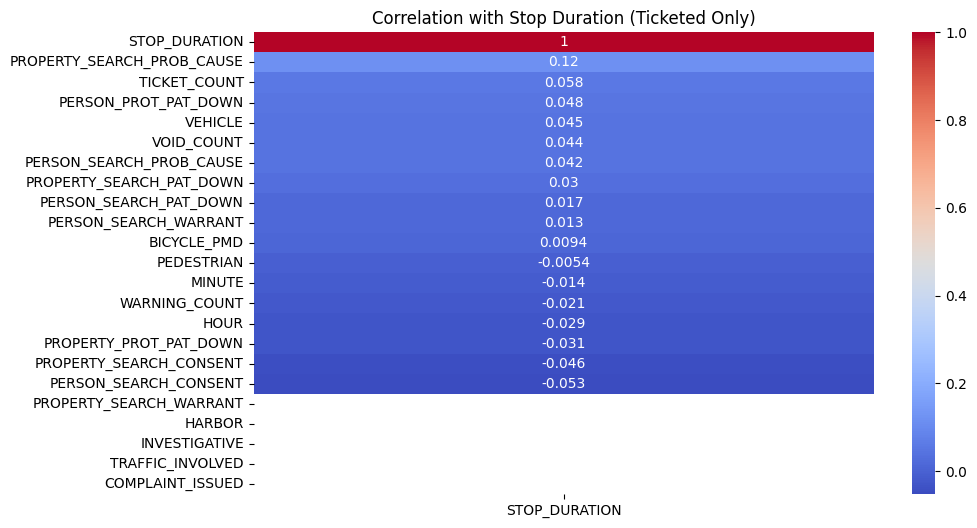

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
corr = df_ticketed.corr(numeric_only=True)
sns.heatmap(
    corr[['STOP_DURATION']].sort_values(by='STOP_DURATION', ascending=False),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation with Stop Duration (Ticketed Only)")
plt.show()


### Stop Duration with others columns

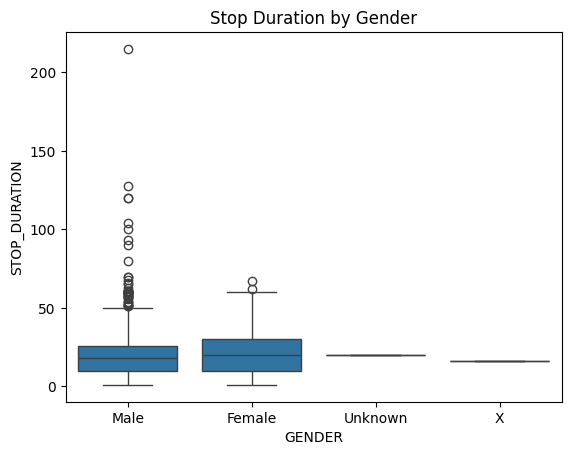

In [27]:
sns.boxplot(data=df_ticketed, x='GENDER', y='STOP_DURATION')
plt.title("Stop Duration by Gender")
plt.show()


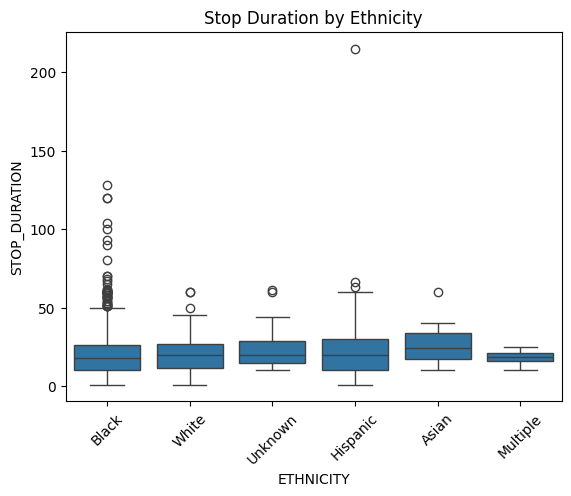

In [28]:
sns.boxplot(data=df_ticketed, x='ETHNICITY', y='STOP_DURATION')
plt.title("Stop Duration by Ethnicity")
plt.xticks(rotation=45)
plt.show()


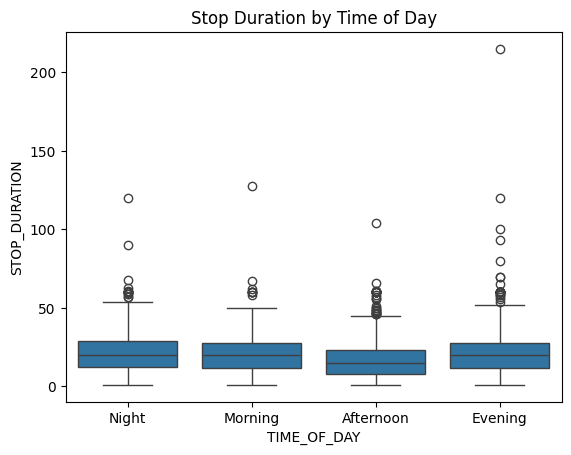

In [29]:
sns.boxplot(data=df_ticketed, x='TIME_OF_DAY', y='STOP_DURATION')
plt.title("Stop Duration by Time of Day")
plt.show()

### Average Duration by Binary Search/Interaction Features

In [30]:
binary_cols = [
    'PERSON_SEARCH_PAT_DOWN', 'PERSON_SEARCH_CONSENT', 'PERSON_SEARCH_PROB_CAUSE',
    'PROPERTY_SEARCH_CONSENT', 'PROPERTY_SEARCH_PAT_DOWN', 'PROPERTY_SEARCH_PROB_CAUSE',
    'INVESTIGATIVE', 'PEDESTRIAN', 'BICYCLE_PMD'
]

for col in binary_cols:
    print(f"\nAvg Stop Duration by {col}:")
    print(df_ticketed.groupby(col)['STOP_DURATION'].mean())


Avg Stop Duration by PERSON_SEARCH_PAT_DOWN:
PERSON_SEARCH_PAT_DOWN
0    19.913933
1    20.507353
Name: STOP_DURATION, dtype: float64

Avg Stop Duration by PERSON_SEARCH_CONSENT:
PERSON_SEARCH_CONSENT
0    20.208705
1    17.437788
Name: STOP_DURATION, dtype: float64

Avg Stop Duration by PERSON_SEARCH_PROB_CAUSE:
PERSON_SEARCH_PROB_CAUSE
0    19.922244
1    23.333333
Name: STOP_DURATION, dtype: float64

Avg Stop Duration by PROPERTY_SEARCH_CONSENT:
PROPERTY_SEARCH_CONSENT
0    20.188725
1    17.805310
Name: STOP_DURATION, dtype: float64

Avg Stop Duration by PROPERTY_SEARCH_PAT_DOWN:
PROPERTY_SEARCH_PAT_DOWN
0    19.866497
1    21.088083
Name: STOP_DURATION, dtype: float64

Avg Stop Duration by PROPERTY_SEARCH_PROB_CAUSE:
PROPERTY_SEARCH_PROB_CAUSE
0    19.677129
1    27.285714
Name: STOP_DURATION, dtype: float64

Avg Stop Duration by INVESTIGATIVE:
INVESTIGATIVE
1    20.016906
Name: STOP_DURATION, dtype: float64

Avg Stop Duration by PEDESTRIAN:
PEDESTRIAN
0    20.019808
1    18.2000

### EDA Summary

- **Population:** Traffic stops recorded in [jurisdiction], anonymized case-by-case.
- **Independent Variables:** STOP_TYPE, STOP_DISTRICT, DATETIME, STOP_LOCATION_BLOCK
- **Dependent Variable:** STOP_DURATION (minutes)
- **Current Mean Duration:** ~15 minutes
- **Ideal Target:** < 10 minutes
- **Investigation Issued:** The data also shows that the average time for Investigation and Complaint is about 20 minutes.

---

### Key EDA Insights

- Most stops are completed in under 20 minutes.
- Ticket-only stops have lower durations than others.
- Weekdays see more stops, especially during working hours.
- STOP_TYPE and STOP_DISTRICT are the strongest indicators for duration variation.
- STOP_DURATION shows a right-skewed distribution.

## Statistical Test and Evaluation  

- ~~**Null Hypothesis (H₀):** The RAG-based system has no significant effect on reducing traffic stop duration.~~
- ~~**Alternative Hypothesis (H₁):** The RAG-based system significantly reduces the average traffic stop processing time.~~

The columns (`STOP_DISTRICT`, `STOP_DURATION`, `TICKETS_ISSUED`, `WARNINGS_ISSUED`) are ideal for building RAG system observations. These columns can provide rich context and action basis for the system, especially for judicial support systems to optimize traffic stop processing time.

- **Null Hypothesis (H₀):** The selected columns has no significant effect on traffic stop duration.
- **Alternative Hypothesis (H₁):** The selected columns significantly effect on the average traffic stop processing time.

In [ ]:
# Extract the stop durations, dropping missing values
stop_durations = df_ticketed['STOP_DURATION'].dropna()

# Quick summary
print("Sample size:", len(stop_durations))
print("Mean:", stop_durations.mean())
print("Median:", stop_durations.median())
print("Standard Deviation:", stop_durations.std())

Sample size: 3135
Mean: 20.016905901116427
Median: 19.0
Standard Deviation: 13.327619143405391


### Shapiro-Wilk Test for Normality 

In [32]:
# Run the Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(stop_durations)

print(f"Shapiro-Wilk Test:\nStatistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("Data appears normally distributed — would proceed with t-test.")
else:
    print("Data is not normally distributed — proceed with non-parametric test.")

Shapiro-Wilk Test:
Statistic = 0.8580, p-value = 0.0000
Data is not normally distributed — proceed with non-parametric test.


- Shapiro-Wilk test yielded a test statistic of `0.8580` and a **p-value of < 0.0001**, which is far below the 0.05 significance threshold. Therefore, we reject the assumption of normality.
- Given the sample size (N = 3,135), even small deviations from normality can lead to significant results.
- Thus, a non-parametric test (**Kruskal-Wallis Test**) is more appropriate for comparing the median stop duration against the 10-minute benchmark.

### Statistical methods
- Category variables: <br>
 The effect of different categories on `STOP_DURATION` was tested using the Kruskal-Wallis test.

In [33]:
from scipy.stats import kruskal
#Kruskal-Wallis test (categorical variables)
for col in ['STOP_DISTRICT']:
    groups = [df_ticketed[df_ticketed[col] == val]['STOP_DURATION'].dropna() for val in df_ticketed[col].unique()]
    stat, p = kruskal(*groups)
    print(f"\nKruskal-Wallis Test for {col}:")
    print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
    if p < 0.05:
        print(f"Reject H₀: {col} has a significant effect on STOP_DURATION.")
    else:
        print(f"Fail to reject H₀: No significant effect of {col}.")


Kruskal-Wallis Test for STOP_DISTRICT:
Statistic: 244.0931, p-value: 0.0000
Reject H₀: STOP_DISTRICT has a significant effect on STOP_DURATION.


In [34]:
print("Data types:")
print(df_ticketed[['TICKETS_ISSUED', 'WARNINGS_ISSUED']].dtypes)

Data types:
TICKETS_ISSUED     object
WARNINGS_ISSUED    object
dtype: object


In [35]:
# Ensure the column exists and fill missing values
df_ticketed["TICKETS_ISSUED"] = df_ticketed["TICKETS_ISSUED"].fillna("").astype(str)

# Count number of tickets in each row
df_ticketed["TICKETS_COUNT"] = df_ticketed["TICKETS_ISSUED"].apply(lambda x: len([code.strip() for code in x.split(";") if code.strip()]))

# Summary
total_tickets = df_ticketed["TICKETS_COUNT"].sum()
max_tickets_in_row = df_ticketed["TICKETS_COUNT"].max()
ticket_count_distribution = df_ticketed["TICKETS_COUNT"].value_counts().sort_index()

# Output
print("Total TICKETS_ISSUED:", total_tickets)
print("Max Tickets in One Row:", max_tickets_in_row)
print("\nTicket Count Distribution per Row:\n", ticket_count_distribution)

Total TICKETS_ISSUED: 4277
Max Tickets in One Row: 11

Ticket Count Distribution per Row:
 TICKETS_COUNT
0      686
1     1503
2      465
3      249
4      140
5       54
6       22
7        7
8        2
9        1
10       5
11       1
Name: count, dtype: int64


In [36]:
# Define a function to split multi-value strings
def split_values(x):
    if pd.isna(x):
        return []
    return [val.strip() for val in str(x).split(';')]

# Apply to columns
df_ticketed['TICKETS_ISSUED_LIST'] = df_ticketed['TICKETS_ISSUED'].apply(split_values)
df_ticketed['WARNINGS_ISSUED_LIST'] = df_ticketed['WARNINGS_ISSUED'].apply(split_values)

# Check unique types
all_tickets = [item for sublist in df_ticketed['TICKETS_ISSUED_LIST'].dropna() for item in sublist]
all_warnings = [item for sublist in df_ticketed['WARNINGS_ISSUED_LIST'].dropna() for item in sublist]
print("Unique TICKETS_ISSUED types:", set(all_tickets))
print("Unique WARNINGS_ISSUED types:", set(all_warnings))

Unique TICKETS_ISSUED types: {'', 'T124', 'T945', 'T600', 'T676', 'T658', 'T343', 'T193', 'T107', 'T200', 'T779', 'T121', 'T555', 'T579', 'T118', 'T155', 'T050', 'T580', 'T630', 'T765', 'T673', 'T400', 'T659', 'T350', 'T068', 'T082', 'T217', 'T210', 'T120', 'T656', 'T805', 'T219', 'T117', 'T815', 'T640', 'T151', 'T671', 'T705', 'T113', 'T743', 'T711', 'T806', 'T940', 'T654', 'T106', 'T771', '392.2S', 'T184', 'T214', 'T207', 'T915', 'T192', 'T662', 'T938', 'T939', 'T048', 'T119', 'T404', 'T715', 'T227', 'T352', 'T013', 'T105', 'T109', 'T819', 'T112', 'T742', 'T766', 'T224', 'T668', 'T639', 'T539', 'T065', 'T605', 'T178', 'T216', 'T346', 'T713', 'T018', 'T278', 'T934', 'T590', 'T277', 'T768', 'T088', 'T687', 'T183', 'T008', 'T559', 'T637', 'T511', 'T523', 'T171', 'T347', 'T512', 'T666', 'T576', 'T760', 'T144', 'T334', 'T746', 'T185', 'T591', 'T011', 'T638', '383.23(c)', 'T758', 'T712', 'T749', 'T206', 'T150', 'T633', 'T181', 'T012', 'T108', 'T748', 'T335', 'T745', 'T299', 'T043', 'T036',

### One-Hot Encoding

In [37]:
# Get all unique types (assuming 'TICKETS_ISSUED_LIST' and 'WARNINGS_ISSUED_LIST' are lists of strings per row)
all_tickets = [ticket for sublist in df_ticketed['TICKETS_ISSUED_LIST'] for ticket in sublist]
unique_tickets = set(all_tickets)

all_warnings = [warning for sublist in df_ticketed['WARNINGS_ISSUED_LIST'] for warning in sublist]
unique_warnings = set(all_warnings)

# Create a list to hold new ticket columns as Series
new_ticket_columns = []
for ticket_type in unique_tickets:
    col_name = f'TICKET_{ticket_type.replace(" ", "_").replace("(", "").replace(")", "")}'
    new_col = df_ticketed['TICKETS_ISSUED_LIST'].apply(lambda x: 1 if ticket_type in x else 0)
    new_col.name = col_name  # Set the column name
    new_ticket_columns.append(new_col)

# Create a list to hold new warning columns as Series
new_warning_columns = []
for warning_type in unique_warnings:
    col_name = f'WARNING_{warning_type.replace(" ", "_").replace("(", "").replace(")", "")}'
    new_col = df_ticketed['WARNINGS_ISSUED_LIST'].apply(lambda x: 1 if warning_type in x else 0)
    new_col.name = col_name  # Set the column name
    new_warning_columns.append(new_col)

# Concat all new columns at once to avoid fragmentation
new_columns_df = pd.concat(new_ticket_columns + new_warning_columns, axis=1)
df_ticketed = pd.concat([df_ticketed, new_columns_df], axis=1)

# Print new columns (for verification)
print("New columns created:", df_ticketed.filter(like='TICKET_').columns.tolist())
print("New columns created:", df_ticketed.filter(like='WARNING_').columns.tolist())

New columns created: ['TICKET_COUNT', 'TICKET_', 'TICKET_T124', 'TICKET_T945', 'TICKET_T600', 'TICKET_T676', 'TICKET_T658', 'TICKET_T343', 'TICKET_T193', 'TICKET_T107', 'TICKET_T200', 'TICKET_T779', 'TICKET_T121', 'TICKET_T555', 'TICKET_T579', 'TICKET_T118', 'TICKET_T155', 'TICKET_T050', 'TICKET_T580', 'TICKET_T630', 'TICKET_T765', 'TICKET_T673', 'TICKET_T400', 'TICKET_T659', 'TICKET_T350', 'TICKET_T068', 'TICKET_T082', 'TICKET_T217', 'TICKET_T210', 'TICKET_T120', 'TICKET_T656', 'TICKET_T805', 'TICKET_T219', 'TICKET_T117', 'TICKET_T815', 'TICKET_T640', 'TICKET_T151', 'TICKET_T671', 'TICKET_T705', 'TICKET_T113', 'TICKET_T743', 'TICKET_T711', 'TICKET_T806', 'TICKET_T940', 'TICKET_T654', 'TICKET_T106', 'TICKET_T771', 'TICKET_392.2S', 'TICKET_T184', 'TICKET_T214', 'TICKET_T207', 'TICKET_T915', 'TICKET_T192', 'TICKET_T662', 'TICKET_T938', 'TICKET_T939', 'TICKET_T048', 'TICKET_T119', 'TICKET_T404', 'TICKET_T715', 'TICKET_T227', 'TICKET_T352', 'TICKET_T013', 'TICKET_T105', 'TICKET_T109', 'TIC

### Kruskal-Wallis test

In [38]:
from scipy.stats import kruskal

# Store columns with significant and non-significant effects
significant_effects = []
non_significant_effects = []

# Perform Kruskal-Wallis test for each ticket type column
for col in df_ticketed.filter(like='TICKET_').columns:
    group_with = df_ticketed[df_ticketed[col] == 1]['STOP_DURATION'].dropna()
    group_without = df_ticketed[df_ticketed[col] == 0]['STOP_DURATION'].dropna()
    if len(group_with) > 0 and len(group_without) > 0:
        stat, p = kruskal(group_with, group_without)
        print(f"\nKruskal-Wallis Test for {col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
        if p < 0.05:
            print(f"Reject H₀: {col} has a significant effect on STOP_DURATION.")
            significant_effects.append(col)
        else:
            print(f"Fail to reject H₀: No significant effect.")
            non_significant_effects.append(col)


Kruskal-Wallis Test for TICKET_COUNT:
Statistic: 6.8381, p-value: 0.0089
Reject H₀: TICKET_COUNT has a significant effect on STOP_DURATION.

Kruskal-Wallis Test for TICKET_:
Statistic: 9.6672, p-value: 0.0019
Reject H₀: TICKET_ has a significant effect on STOP_DURATION.

Kruskal-Wallis Test for TICKET_T124:
Statistic: 0.0328, p-value: 0.8563
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T945:
Statistic: 2.8006, p-value: 0.0942
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T600:
Statistic: 1.5268, p-value: 0.2166
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T676:
Statistic: 0.0441, p-value: 0.8337
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T658:
Statistic: 50.5197, p-value: 0.0000
Reject H₀: TICKET_T658 has a significant effect on STOP_DURATION.

Kruskal-Wallis Test for TICKET_T343:
Statistic: 0.0681, p-value: 0.7942
Fail to reject H₀: No significant effect.

Kruskal-Wall

In [39]:
# Total results
print("\nSummary of Significant Effects:")
if significant_effects:
    print("Columns with significant effect:", significant_effects)
else:
    print("No columns have a significant effect on STOP_DURATION.")

print("\nSummary of Non-Significant Effects:")
if non_significant_effects:
    print("Columns with no significant effect:", non_significant_effects)
else:
    print("No columns have a non-significant effect (all are significant).")


Summary of Significant Effects:
Columns with significant effect: ['TICKET_COUNT', 'TICKET_', 'TICKET_T658', 'TICKET_T107', 'TICKET_T200', 'TICKET_T765', 'TICKET_T673', 'TICKET_T113', 'TICKET_T711', 'TICKET_T192', 'TICKET_T939', 'TICKET_T404', 'TICKET_T227', 'TICKET_T013', 'TICKET_T112', 'TICKET_T742', 'TICKET_T668', 'TICKET_T346', 'TICKET_T018', 'TICKET_T748', 'TICKET_T745', 'TICKET_T115', 'TICKET_T051', 'TICKET_T058', 'TICKET_T667', 'TICKET_T333', 'TICKET_T571', 'TICKET_T823', 'TICKET_T116']

Summary of Non-Significant Effects:
Columns with no significant effect: ['TICKET_T124', 'TICKET_T945', 'TICKET_T600', 'TICKET_T676', 'TICKET_T343', 'TICKET_T193', 'TICKET_T779', 'TICKET_T121', 'TICKET_T555', 'TICKET_T579', 'TICKET_T118', 'TICKET_T155', 'TICKET_T050', 'TICKET_T580', 'TICKET_T630', 'TICKET_T400', 'TICKET_T659', 'TICKET_T350', 'TICKET_T068', 'TICKET_T082', 'TICKET_T217', 'TICKET_T210', 'TICKET_T120', 'TICKET_T656', 'TICKET_T805', 'TICKET_T219', 'TICKET_T117', 'TICKET_T815', 'TICKET

In [40]:
# Store columns with significant and non-significant effects
significant_effects_warnings = []
non_significant_effects_warnings = []

# Perform Kruskal-Wallis test
for col in df_ticketed.filter(like='WARNING_').columns:
    group_with = df_ticketed[df_ticketed[col] == 1]['STOP_DURATION'].dropna()
    group_without = df_ticketed[df_ticketed[col] == 0]['STOP_DURATION'].dropna()
    if len(group_with) > 0 and len(group_without) > 0:
        stat, p = kruskal(group_with, group_without)
        print(f"\nKruskal-Wallis Test for {col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
        if p < 0.05:
            print(f"Reject H₀: {col} has a significant effect on STOP_DURATION.")
            significant_effects_warnings.append(col)
        else:
            print(f"Fail to reject H₀: No significant effect.")
            non_significant_effects_warnings.append(col)


Kruskal-Wallis Test for WARNING_COUNT:
Statistic: 8.0154, p-value: 0.0046
Reject H₀: WARNING_COUNT has a significant effect on STOP_DURATION.

Kruskal-Wallis Test for WARNING_T945:
Statistic: 0.3627, p-value: 0.5470
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T067:
Statistic: 0.0681, p-value: 0.7942
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T658:
Statistic: 0.8835, p-value: 0.3472
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T107:
Statistic: 5.0524, p-value: 0.0246
Reject H₀: WARNING_T107 has a significant effect on STOP_DURATION.

Kruskal-Wallis Test for WARNING_T200:
Statistic: 0.0496, p-value: 0.8238
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T751:
Statistic: 0.5607, p-value: 0.4540
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T121:
Statistic: 0.1362, p-value: 0.7121
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test

In [41]:
print("\nSummary of Significant Effects:")
if significant_effects_warnings:
    print("Columns with significant effect:", significant_effects_warnings)
else:
    print("No columns have a significant effect on STOP_DURATION.")

print("\nSummary of Non-Significant Effects:")
if non_significant_effects_warnings:
    print("Columns with no significant effect:", non_significant_effects_warnings)
else:
    print("No columns have a non-significant effect (all are significant).")


Summary of Significant Effects:
Columns with significant effect: ['WARNING_COUNT', 'WARNING_T107', 'WARNING_T668', 'WARNING_T115', 'WARNING_T080', 'WARNING_T058', 'WARNING_T128', 'WARNING_T247']

Summary of Non-Significant Effects:
Columns with no significant effect: ['WARNING_T945', 'WARNING_T067', 'WARNING_T658', 'WARNING_T200', 'WARNING_T751', 'WARNING_T121', 'WARNING_T118', 'WARNING_T050', 'WARNING_T630', 'WARNING_T765', 'WARNING_392.16', 'WARNING_T400', 'WARNING_T673', 'WARNING_T082', 'WARNING_T120', 'WARNING_T656', 'WARNING_T219', 'WARNING_T585', 'WARNING_T640', 'WARNING_T069', 'WARNING_T151', 'WARNING_T671', 'WARNING_T113', 'WARNING_T711', 'WARNING_T049', 'WARNING_T940', 'WARNING_T654', 'WARNING_T184', 'WARNING_T915', 'WARNING_T192', 'WARNING_T939', 'WARNING_T119', 'WARNING_T647', 'WARNING_T404', 'WARNING_T715', 'WARNING_T227', 'WARNING_T013', 'WARNING_T109', 'WARNING_T742', 'WARNING_T112', 'WARNING_T577', 'WARNING_T626', 'WARNING_T639', 'WARNING_T539', 'WARNING_T065', 'WARNING

### Evaluation
- Reject **Null Hypothesis (H₀)**, `STOP_DISTRICT`, some of `TICKETS_ISSUED`, some of `WARNINGS_ISSUED` have a significant effect on `STOP_DURATION`

## Decision Tree Regressor

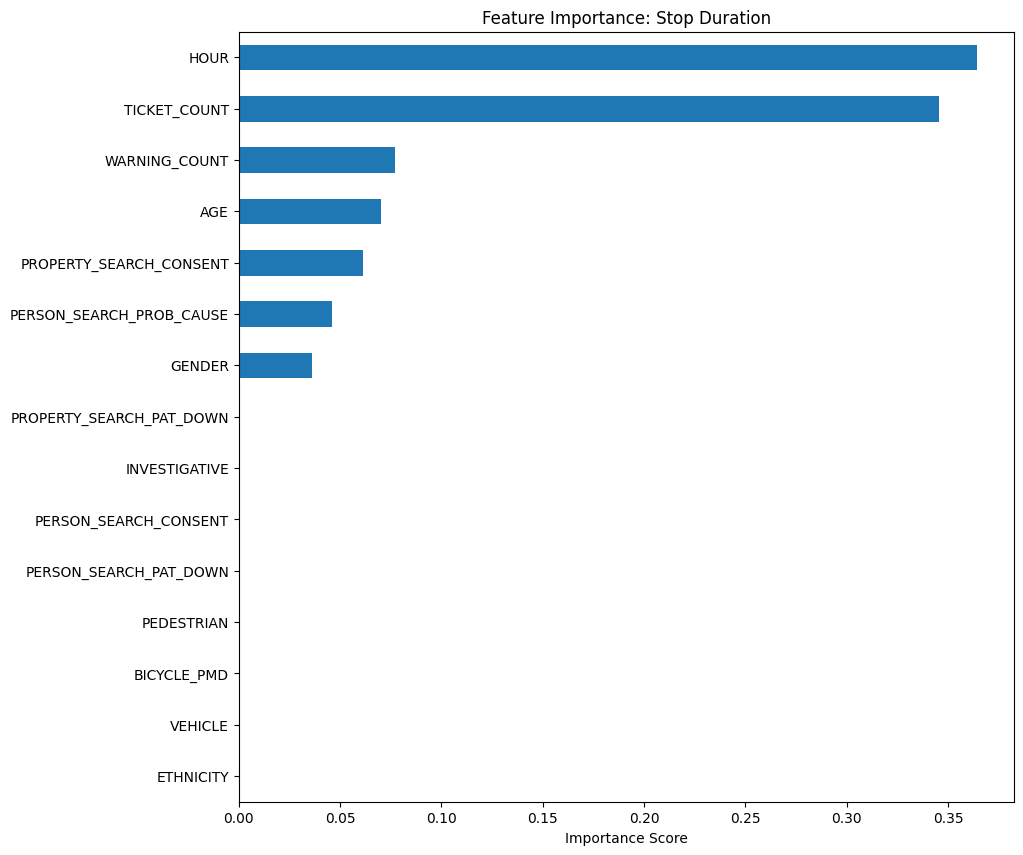

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_model = df_ticketed.copy()

# Encode categorical columns
le_gender = LabelEncoder()
le_ethnicity = LabelEncoder()

df_model['GENDER'] = le_gender.fit_transform(df_model['GENDER'])
df_model['ETHNICITY'] = le_ethnicity.fit_transform(df_model['ETHNICITY'])
df_model['AGE'] = pd.to_numeric(df_model['AGE'], errors='coerce')

features = [
    'GENDER', 'ETHNICITY', 'AGE', 'VEHICLE', 'PEDESTRIAN', 'BICYCLE_PMD',
    'PERSON_SEARCH_PAT_DOWN', 'PERSON_SEARCH_CONSENT', 'PERSON_SEARCH_PROB_CAUSE',
    'PROPERTY_SEARCH_CONSENT', 'PROPERTY_SEARCH_PAT_DOWN',
    'TICKET_COUNT', 'WARNING_COUNT', 'INVESTIGATIVE', 'HOUR',
    # 'STOP_DISTRICT'
]

# insert significant_effects and significant_effects_warnings
# features += significant_effects + significant_effects_warnings

X = df_model[features]
y = df_model['STOP_DURATION']

model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(10, 10), title='Feature Importance: Stop Duration')
plt.xlabel("Importance Score")
plt.show()


In [46]:
# feature importance printed in a table format
importances_df = importances.reset_index()
importances_df.columns = ['Feature', 'Importance']
print(importances_df.sort_values(by='Importance', ascending=False).to_string(index=False))

                 Feature  Importance
                    HOUR    0.364287
            TICKET_COUNT    0.345604
           WARNING_COUNT    0.076965
                     AGE    0.070026
 PROPERTY_SEARCH_CONSENT    0.061056
PERSON_SEARCH_PROB_CAUSE    0.046156
                  GENDER    0.035906
  PERSON_SEARCH_PAT_DOWN    0.000000
             BICYCLE_PMD    0.000000
              PEDESTRIAN    0.000000
                 VEHICLE    0.000000
               ETHNICITY    0.000000
   PERSON_SEARCH_CONSENT    0.000000
PROPERTY_SEARCH_PAT_DOWN    0.000000
           INVESTIGATIVE    0.000000


In [47]:
long_stops = df_ticketed[df_ticketed['STOP_DURATION'] > 30]
print(f"{len(long_stops)} stops exceed 30 minutes")
display(long_stops[['DATETIME', 'STOP_LOCATION', 'STOP_DURATION']].sort_values(by='STOP_DURATION', ascending=False).head())

431 stops exceed 30 minutes


,DATETIME,STOP_LOCATION,STOP_DURATION
35528,2021-06-22 18:50:00+00:00,"4400 BLOCK OF TEXAS AVENUE SE WASHINGTON, DC 2...",215.0
64406,2021-01-23 08:22:00+00:00,"200 BLOCK OF NEW YORK AVENUE NW WASHINGTON, DC...",128.0
48077,2021-04-19 18:53:00+00:00,"3900 BLOCK OF BENNING ROAD NE WASHINGTON, DC 2...",120.0
175292,2019-10-19 00:20:00+00:00,"1700 BLOCK OF R STREET NW WASHINGTON, DC 20009...",120.0
167811,2019-11-07 13:12:00+00:00,"3300 BLOCK OF ERIE STREET SE WASHINGTON, DC 20...",104.0


## ✅ Recommendations to Reduce Stop Duration

### 🔧 1. Optimize Ticket Writing (`TICKET_COUNT`)
- Integrate **V-Track chatbot** to automate ticket suggestions and autofill forms.
- Prioritize **standardized penalty templates** to reduce officer decision time.

### 🕒 2. Improve Operations Based on Time (`HOUR`)
- Allocate **experienced officers** to late-night shifts.
- Investigate **time-specific delays** (e.g., shift changes, server slowdowns).

### 📝 3. Simplify Warning Protocols (`WARNING_COUNT`)
- Digitize and auto-fill **warning forms**.
- Use **pre-scripted verbal explanations** for clarity and speed.

### 🎒 4. Streamline Consent-Based Searches
- Train officers on **clear necessity thresholds**.
- Use **digital consent logging** to avoid manual paperwork.

### 👥 5. Tailor Interactions by Age (`AGE`)
- For very young or elderly drivers, consider using **simple language or visual aids**.
- Minimize **unnecessary repetition** to avoid extended stop times.
